# imports

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# importing dataset
df = pd.read_csv('../data/AdSmartABdata.csv')
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [3]:
# checking null values
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

# task 1.1
Which online users belong to the control and exposed groups?
How are the users targeted?
Could we use the counts of yes and no answers to make a judgement on which experiment is performing better? For example if #yes > #no for the exposed group than the control group, could we declare that the ad had a significant impact Why or why not?
What is the statistical process that generates the data? Which kind of statistical model will you use if you were to simulate the data?
Assessment of the statistical significance of an A/B test is dependent on what kind of probability distribution the experimental data follows. Given your answer above, which statistical tests (z-test, t-test, etc.) are appropriate to use for this project?
In classical (frequentist) A/B testing, we use p-values to measure the significance of the experimental feature (being exposed to an ad in our case)  over the null hypothesis (the hypothesis that there is no difference in brand awareness between the exposed and control groups in the current case). How are p-values computed? What information do p-values provide? What are the  type-I and type-II errors you may have in the analysis? Can you comment on which error types p-values are related?
How does the classical A/B testing (using z-test, f-test, etc.) framework work?
How does sequential A/B testing work?
What are some of the advantages of sequential A/B testing? 
How is A/B testing done using machine learning? What is the core idea behind this approach? In other words, what part of the machine learning analysis provides the insight regarding the high or no significance of the experimental feature?
What are the pros and cons of using Machine learning to perform A/B testing?   
In max three statements, make a problem formulation for machine learning and specify the target variable


<AxesSubplot:>

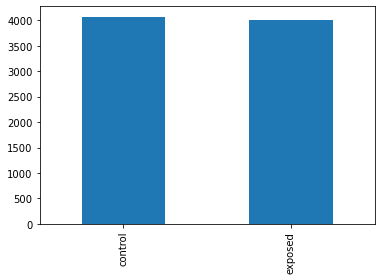

In [4]:
# which online user belong to the control and exposed groups
df['experiment'].value_counts().plot(kind='bar')

In [6]:
control_df = df[df['experiment']=='control']
exposed_df = df[df['experiment']=='exposed']

<AxesSubplot:>

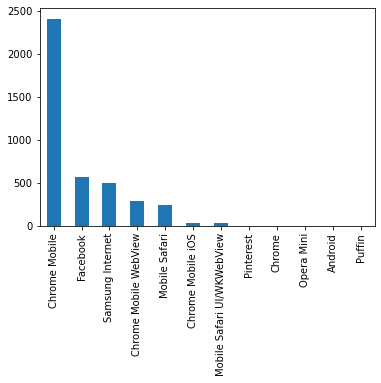

In [15]:
control_df['browser'].value_counts().plot(kind='bar')
# exposed_df['browser'].value_counts().plot(kind='bar')

<AxesSubplot:>

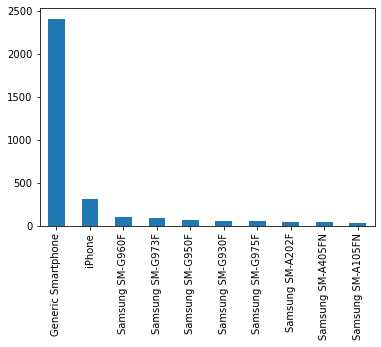

In [11]:
control_df['device_make'].value_counts()[:10].plot(kind='bar')

In [27]:
control_df['yes'].value_counts()

0    3807
1     264
Name: yes, dtype: int64

In [28]:
exposed_df['yes'].value_counts()

0    3698
1     308
Name: yes, dtype: int64

In [30]:
exposed_df['auction_id'].value_counts()

0008ef63-77a7-448b-bd1e-075f42c55e39    1
aaec3a7c-6ff3-45df-9fbf-f4f2ae3852e9    1
aa33623a-deaa-4ffd-b569-d4ec2bf557a5    1
aa4311e1-dd7a-4110-990c-fea57c877fdc    1
aa4397f1-89e4-4081-920a-cc2f464ec0e7    1
                                       ..
581ed31c-3642-4e64-9331-86a304130afc    1
582427c7-1aa4-4ecc-95c6-d6fdb3980a4c    1
584f440e-046a-4cad-a8bb-686dc1d0f626    1
585a6caf-04de-4325-8437-a4a7e4a65f65    1
ffeeed62-3f7c-4a6e-8ba7-95d303d40969    1
Name: auction_id, Length: 4006, dtype: int64

In [39]:
df[(df['yes']==0) & (df['no']==0)]

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [43]:
len(exposed_df[exposed_df['yes']==1])

308